In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [5]:
data.isnull().sum()/len(data)*100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nationality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age                                               0.0
International               

In [6]:
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [7]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [8]:
print(data["Target"].unique())

[0 2 1]


In [9]:
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

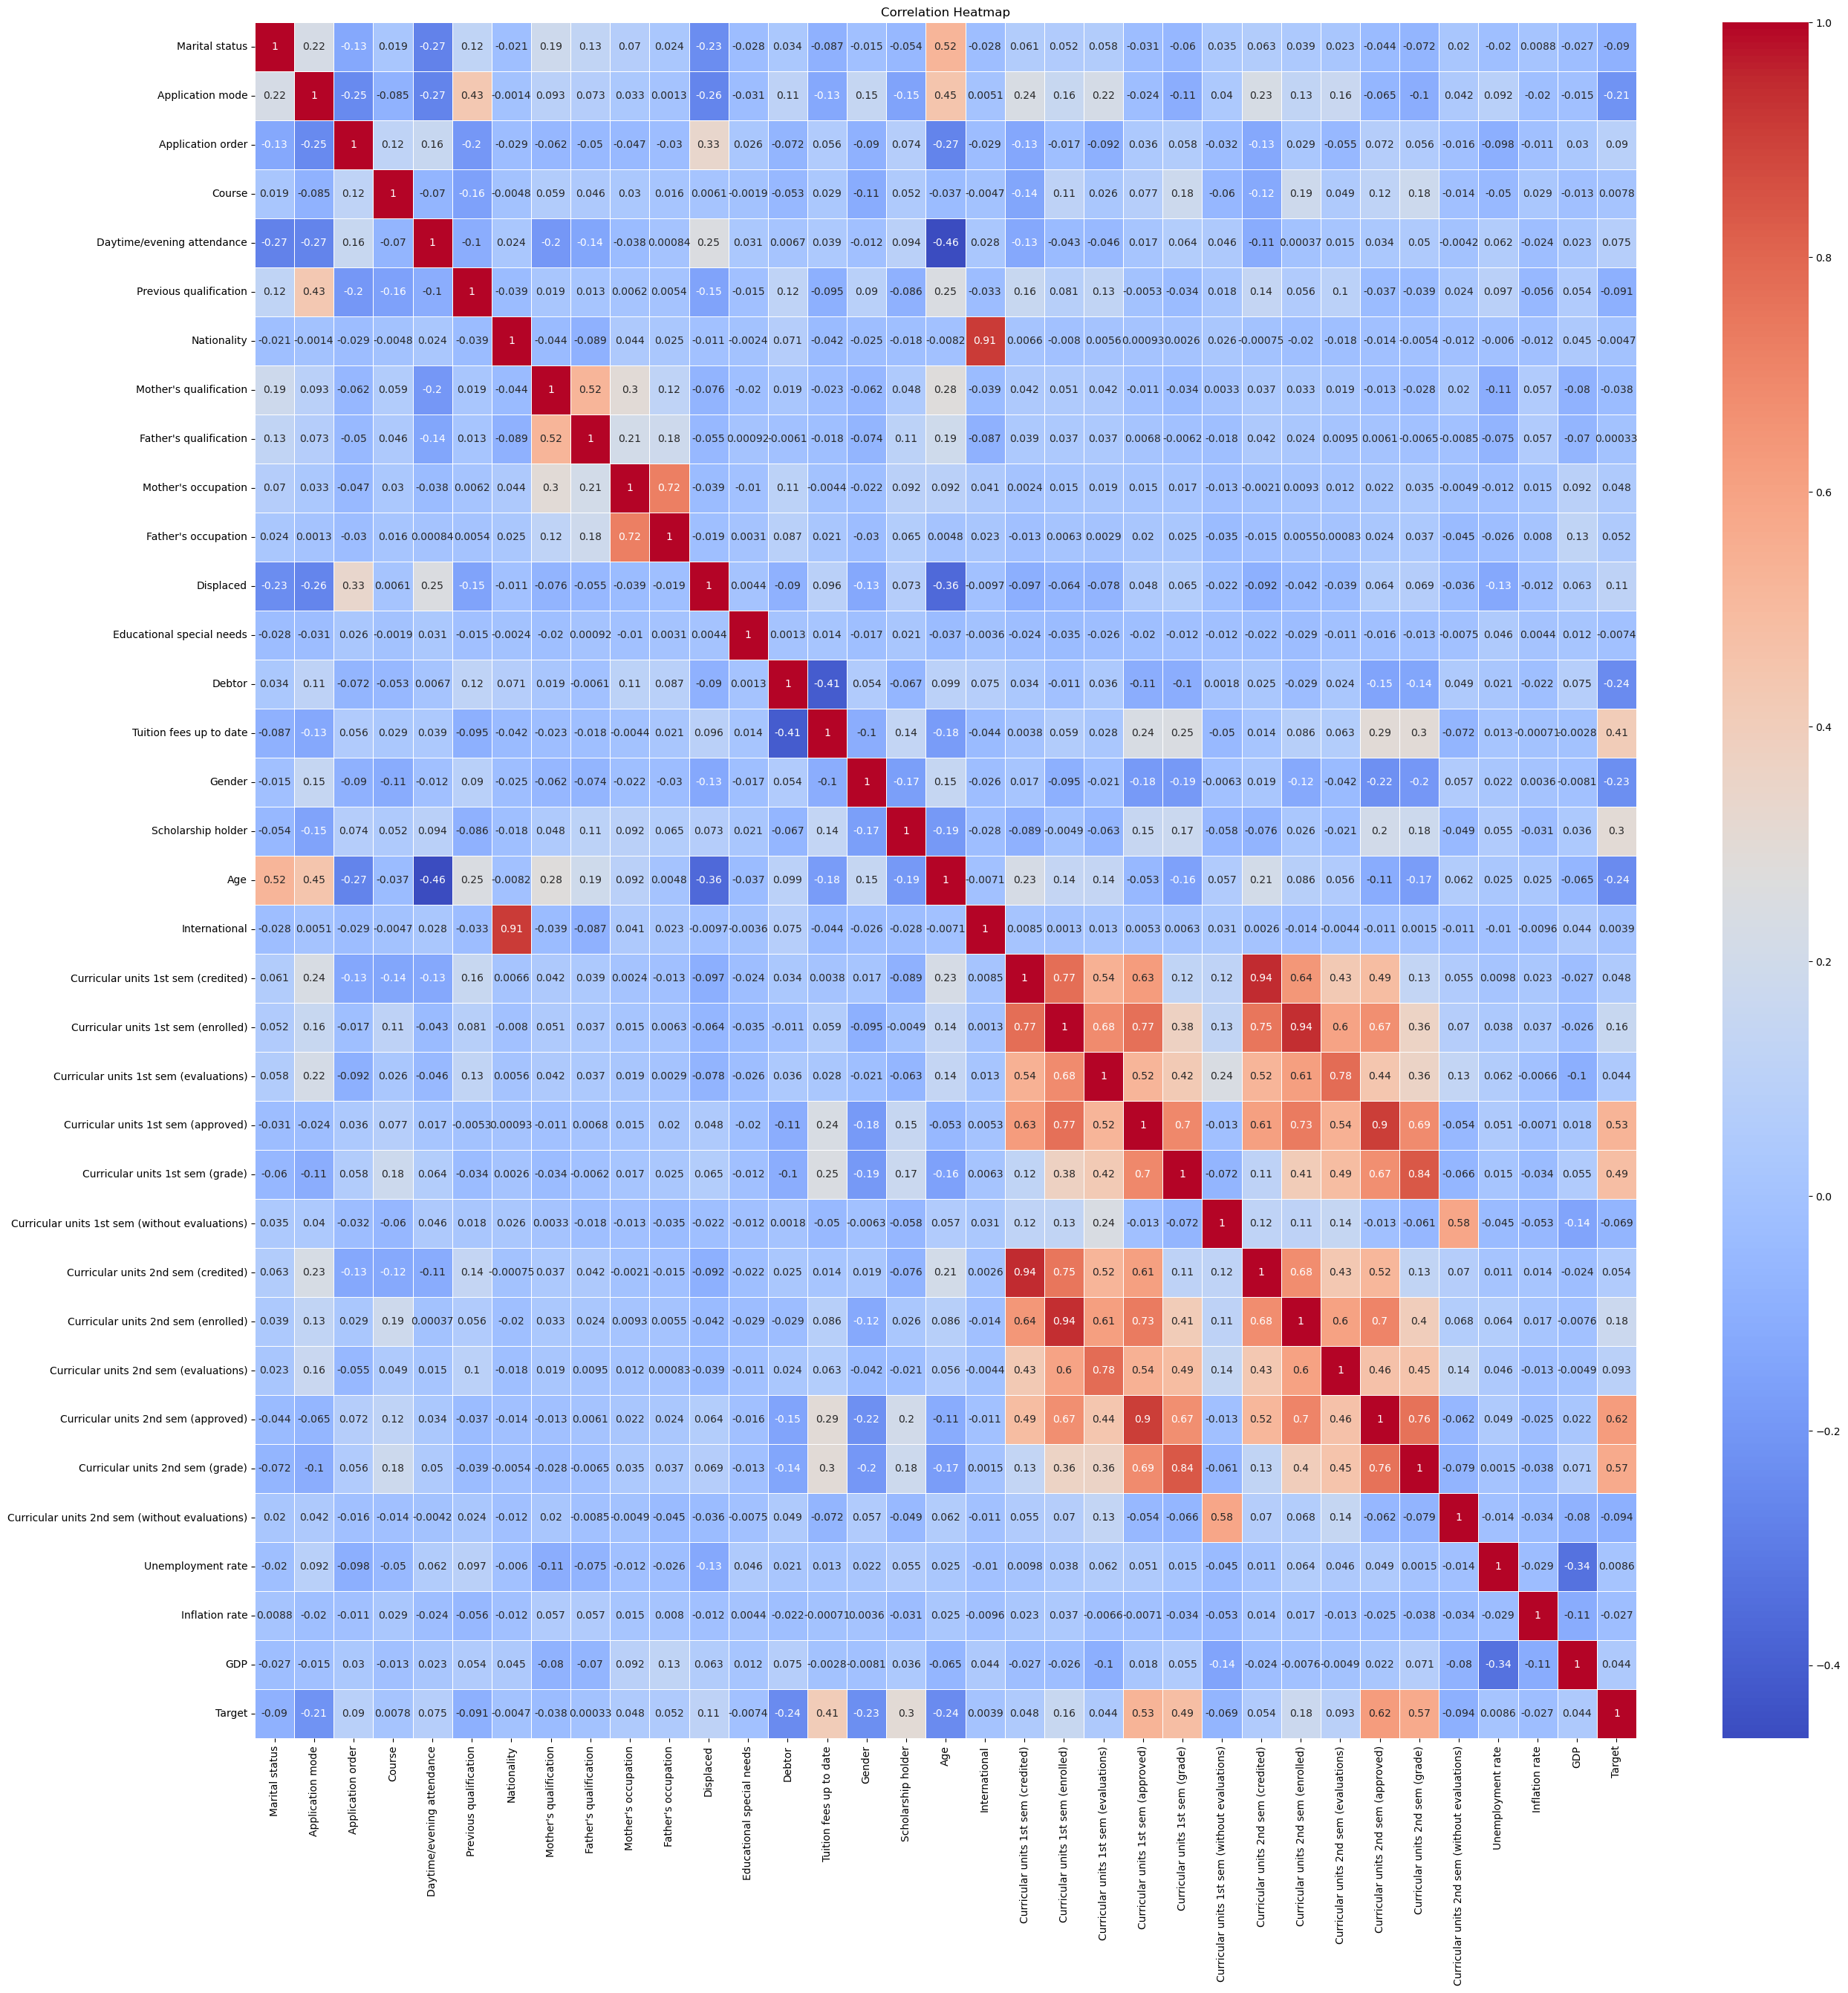

In [10]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
new_data = data.copy()
new_data = new_data.drop(columns=['Nationality',
                                  'Mother\'s qualification',
                                  'Father\'s qualification',
                                  'Educational special needs',
                                  'International',
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate',
                                  'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

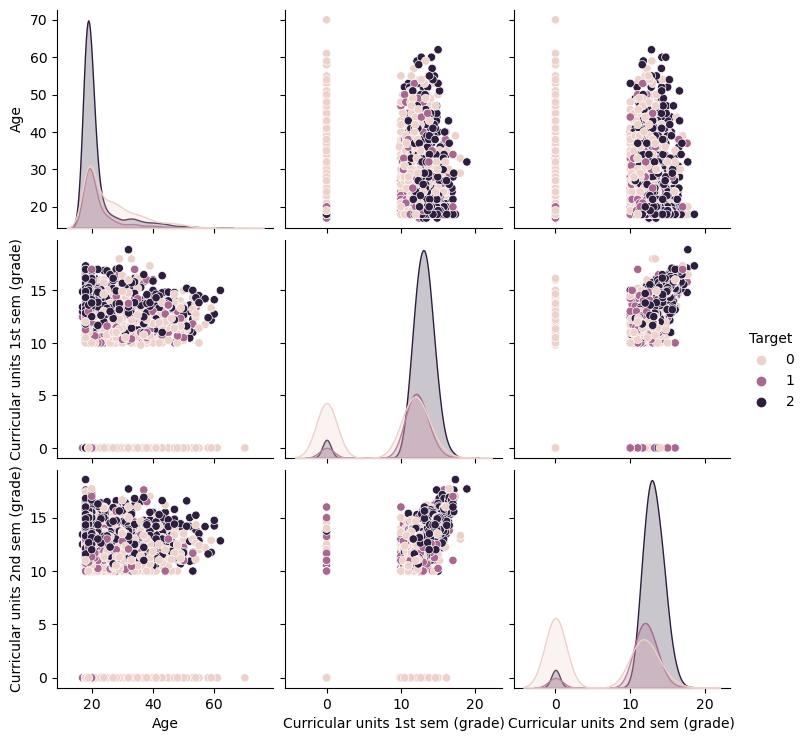

In [12]:
selected_features = ['Age', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']
sns.pairplot(data[selected_features], hue='Target')
plt.show()


In [13]:
new_data['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [14]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target',
             values ='Count_T',
            title='Сколько в столбце Target отчисленных, зачисленных и выпускников?')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

/Users/maiisovoya/anaconda3/lib/python3.10/site-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



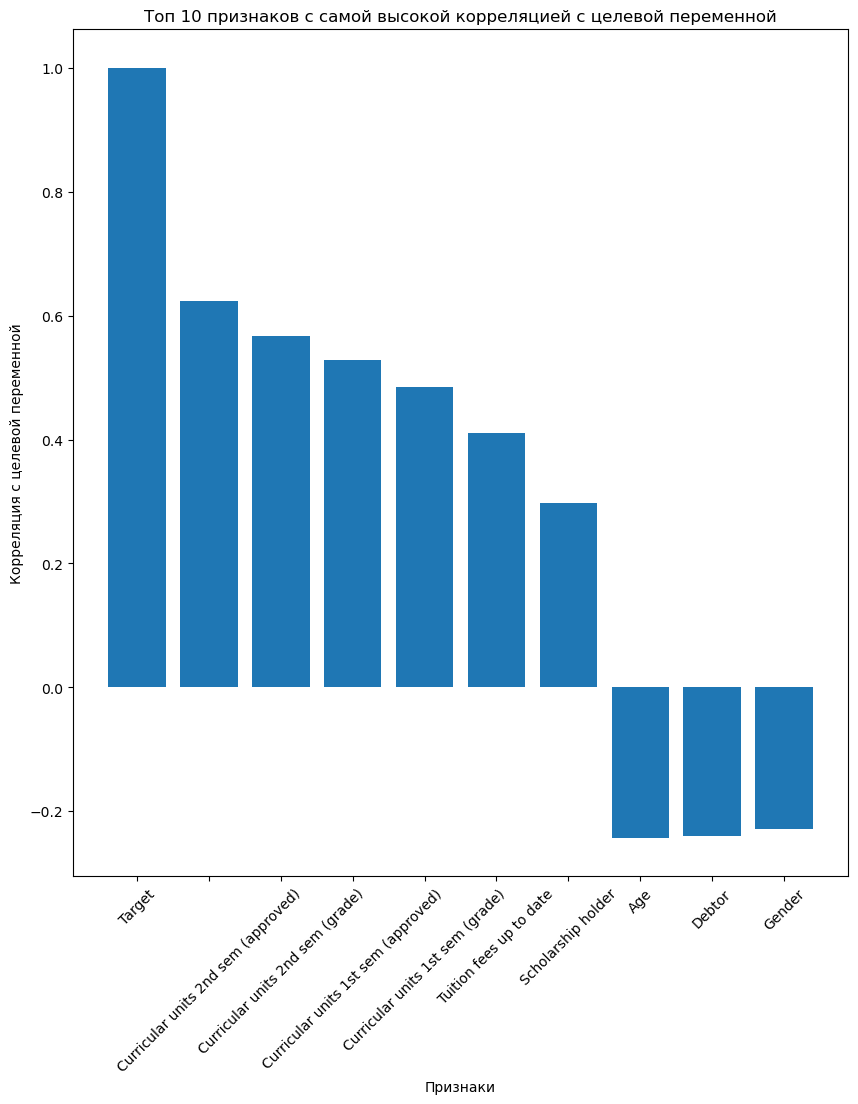

In [15]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Признаки')
plt.ylabel('Корреляция с целевой переменной')
plt.title('Топ 10 признаков с самой высокой корреляцией с целевой переменной')
plt.xticks(rotation=45)
plt.show()

In [16]:
px.histogram(new_data['Age'], x='Age',color_discrete_sequence=['lightblue'])

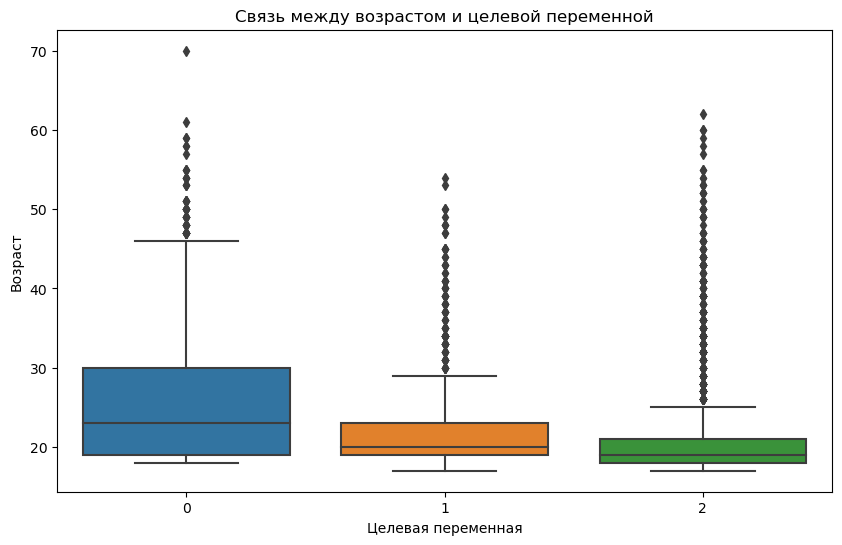

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=new_data)
plt.xlabel('Целевая переменная')
plt.ylabel('Возраст')
plt.title('Связь между возрастом и целевой переменной')
plt.show()

In [18]:
X = new_data.drop('Target', axis=1)
y = new_data['Target']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
rfc = RandomForestClassifier(random_state=2)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

In [22]:
y_pred_rfc = rfc.predict(X_test)

In [23]:
mae_rfc = mean_absolute_error(y_test, y_pred_rfc)
r2_rfc = r2_score(y_test, y_pred_rfc)

print(f'Random Forest: MAE = {mae_rfc:.4f}, R2 = {r2_rfc:.4f}')

Random Forest: MAE = 0.2520, R2 = 0.5376


In [24]:

print("Accuracy:", round(accuracy_score(y_test, y_pred_rfc) * 100, 2), "%")
print("Precision:", precision_score(y_test, y_pred_rfc, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rfc, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rfc, average='macro'))

Accuracy: 80.56 %
Precision: 0.7641489804411153
Recall: 0.7241749491306436
F1 Score: 0.7377178432645765


In [25]:

lr = LogisticRegression(random_state=42)

In [26]:
lr.fit(X_train,y_train)

/Users/maiisovoya/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [27]:
y_pred_lr = lr.predict(X_test)

In [28]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Logistic Regression: MAE = {mae_lr:.4f}, R2 = {r2_lr:.4f}')

Logistic Regression: MAE = 0.2814, R2 = 0.4892


In [29]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr) * 100, 2), "%")
print("Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))

Accuracy: 78.08 %
Precision: 0.7234674566678457
Recall: 0.6854442129845544
F1 Score: 0.6955019303988562


In [30]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)

In [31]:
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=0)

In [32]:
y_pred_abc = abc.predict(X_test)

In [33]:
mae_abc = mean_absolute_error(y_test, y_pred_abc)
r2_abc = r2_score(y_test, y_pred_abc)

print(f'AdaBoost: MAE = {mae_abc:.4f}, R2 = {r2_abc:.4f}')

AdaBoost: MAE = 0.2847, R2 = 0.4992


In [34]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_abc) * 100, 2), "%")
print("Precision:", precision_score(y_test, y_pred_abc, average='macro'))
print("Recall:", recall_score(y_test, y_pred_abc, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_abc, average='macro'))

Accuracy: 77.18 %
Precision: 0.7037862714092222
Recall: 0.6862512825296148
F1 Score: 0.6921723701653838
